In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
full_data_1 = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_29_21_Octadecane_Abs_Unblanked_pt1")
full_data_2 = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_29_21_Octadecane_Abs_Unblanked_pt2")
full_data = pd.concat([full_data_1, full_data_2], axis=0, ignore_index=True)
# full_data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_29_21_Octadecane_Abs_Unblanked_pt2")
wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]

full_data

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.000000,0.0005,0.2,0.799500,0.000000,0.000000,...,0.058,0.058,0.058,0.058,0.057,0.057,0.057,0.057,0.057,0.057
1,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.000000,0.0005,0.4,0.599500,0.000000,0.000000,...,0.043,0.044,0.044,0.043,0.043,0.043,0.043,0.043,0.043,0.043
2,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.000000,0.0005,0.6,0.399500,0.000000,0.000000,...,0.049,0.049,0.049,0.049,0.049,0.048,0.048,0.048,0.048,0.048
3,S2_A4_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.000000,0.0005,0.8,0.199500,0.000000,0.000000,...,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044
4,S2_A5_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.000111,0.0005,0.3,0.699389,0.000133,0.171600,...,0.051,0.051,0.051,0.050,0.050,0.050,0.050,0.049,0.049,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,S2_F6_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F6,0.000889,0.0005,0.5,0.498611,0.001067,1.372801,...,0.521,0.516,0.511,0.506,0.501,0.497,0.492,0.488,0.483,0.478
65,S2_F7_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F7,0.000889,0.0005,0.7,0.298611,0.001067,1.372801,...,0.131,0.131,0.132,0.132,0.133,0.133,0.133,0.133,0.134,0.134
66,S2_F8_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F8,0.001000,0.0005,0.3,0.698500,0.001200,1.544402,...,0.353,0.349,0.345,0.340,0.336,0.332,0.328,0.324,0.320,0.316
67,S2_F9_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F9,0.001000,0.0005,0.5,0.498500,0.001200,1.544402,...,0.668,0.662,0.656,0.650,0.643,0.638,0.631,0.625,0.620,0.614


In [25]:
# data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\07_27_21_Manual_Abs_Unblanked")
# data

In [26]:
cb_0 = full_data[full_data['Octadecane concentration wtf'] == 0]
blanks = cb_0[cb_0['Octadecane concentration wtf'] == 0].copy()
samples = full_data.copy()
blanked_samples = samples.copy()
blanks

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.0,0.0005,0.2,0.7995,0.0,0.0,...,0.058,0.058,0.058,0.058,0.057,0.057,0.057,0.057,0.057,0.057
1,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.0,0.0005,0.4,0.5995,0.0,0.0,...,0.043,0.044,0.044,0.043,0.043,0.043,0.043,0.043,0.043,0.043
2,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.0,0.0005,0.6,0.3995,0.0,0.0,...,0.049,0.049,0.049,0.049,0.049,0.048,0.048,0.048,0.048,0.048
3,S2_A4_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.0,0.0005,0.8,0.1995,0.0,0.0,...,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044
35,S2_D1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,D1,0.0,0.0005,0.3,0.6995,0.0,0.0,...,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.052,0.052,0.052
36,S2_D2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,D2,0.0,0.0005,0.5,0.4995,0.0,0.0,...,0.044,0.044,0.044,0.044,0.044,0.044,0.043,0.044,0.044,0.044
37,S2_D3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,D3,0.0,0.0005,0.7,0.2995,0.0,0.0,...,0.048,0.048,0.048,0.048,0.048,0.047,0.047,0.047,0.047,0.047


In [27]:
samples_etoh = samples.groupby('ethanol concentration wtf')
blanks_etoh = blanks.groupby('ethanol concentration wtf')

In [28]:
blanked_spectras_list = []
for etoh, group in samples_etoh:
    single_etoh_samples = group
    single_etoh_spectras = single_etoh_samples[wavelength_columns]
    blank_sample = blanks[blanks['ethanol concentration wtf']==etoh]
    blank_spectra = blank_sample[wavelength_columns]

    blanked_spectras = single_etoh_spectras-blank_spectra.values
    blanked_spectras_list.append(blanked_spectras)

In [29]:
pd.concat(blanked_spectras_list,axis=0)

,300.0nm,305.0nm,310.0nm,315.0nm,320.0nm,325.0nm,330.0nm,335.0nm,340.0nm,345.0nm,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.190,0.177,0.169,0.160,0.151,0.143,0.136,0.130,0.124,0.118,...,0.007,0.007,0.007,0.007,0.008,0.007,0.007,0.007,0.006,0.006
14,0.646,0.613,0.586,0.561,0.538,0.515,0.495,0.475,0.456,0.437,...,0.052,0.051,0.049,0.049,0.049,0.048,0.047,0.046,0.045,0.044
21,1.196,1.156,1.121,1.087,1.054,1.023,0.991,0.963,0.934,0.905,...,0.163,0.161,0.159,0.157,0.155,0.153,0.151,0.149,0.146,0.144
28,1.435,1.399,1.367,1.337,1.308,1.279,1.251,1.225,1.197,1.170,...,0.318,0.315,0.312,0.309,0.307,0.304,0.301,0.297,0.294,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,-0.007,-0.009,-0.009,-0.007,-0.007,-0.006,-0.006,-0.006,-0.006,-0.006,...,-0.003,-0.003,-0.003,-0.003,-0.004,-0.004,-0.004,-0.004,-0.004,-0.004
41,0.002,-0.003,-0.005,-0.004,-0.004,-0.003,-0.003,-0.001,-0.001,-0.001,...,-0.002,-0.002,-0.002,-0.002,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003
48,-0.003,-0.007,-0.008,-0.007,-0.006,-0.005,-0.004,-0.003,-0.002,-0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.001,-0.001,0.000,0.000
55,0.002,-0.002,-0.004,-0.004,-0.003,-0.002,-0.001,0.000,0.000,0.000,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001


In [30]:
blanked_samples

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.000000,0.0005,0.2,0.799500,0.000000,0.000000,...,0.058,0.058,0.058,0.058,0.057,0.057,0.057,0.057,0.057,0.057
1,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.000000,0.0005,0.4,0.599500,0.000000,0.000000,...,0.043,0.044,0.044,0.043,0.043,0.043,0.043,0.043,0.043,0.043
2,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.000000,0.0005,0.6,0.399500,0.000000,0.000000,...,0.049,0.049,0.049,0.049,0.049,0.048,0.048,0.048,0.048,0.048
3,S2_A4_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.000000,0.0005,0.8,0.199500,0.000000,0.000000,...,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044,0.044
4,S2_A5_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.000111,0.0005,0.3,0.699389,0.000133,0.171600,...,0.051,0.051,0.051,0.050,0.050,0.050,0.050,0.049,0.049,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,S2_F6_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F6,0.000889,0.0005,0.5,0.498611,0.001067,1.372801,...,0.521,0.516,0.511,0.506,0.501,0.497,0.492,0.488,0.483,0.478
65,S2_F7_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F7,0.000889,0.0005,0.7,0.298611,0.001067,1.372801,...,0.131,0.131,0.132,0.132,0.133,0.133,0.133,0.133,0.134,0.134
66,S2_F8_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F8,0.001000,0.0005,0.3,0.698500,0.001200,1.544402,...,0.353,0.349,0.345,0.340,0.336,0.332,0.328,0.324,0.320,0.316
67,S2_F9_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F9,0.001000,0.0005,0.5,0.498500,0.001200,1.544402,...,0.668,0.662,0.656,0.650,0.643,0.638,0.631,0.625,0.620,0.614


In [31]:
blanked_samples[wavelength_columns] = pd.concat(blanked_spectras_list,axis=0)
blanked_samples.to_csv(r'07_29_21_Ocatdecane_Blanked_Abs_Complete', index=False)
blanked_samples

,UID,Labware,Slot,Well,Octadecane concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,Octadecane amount mass g,Octadecane amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,S2_A1_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.000000,0.0005,0.2,0.799500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,S2_A2_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.000000,0.0005,0.4,0.599500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,S2_A3_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.000000,0.0005,0.6,0.399500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,S2_A4_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.000000,0.0005,0.8,0.199500,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,S2_A5_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.000111,0.0005,0.3,0.699389,0.000133,0.171600,...,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,S2_F6_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F6,0.000889,0.0005,0.5,0.498611,0.001067,1.372801,...,0.477,0.472,0.467,0.462,0.457,0.453,0.449,0.444,0.439,0.434
65,S2_F7_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F7,0.000889,0.0005,0.7,0.298611,0.001067,1.372801,...,0.083,0.083,0.084,0.084,0.085,0.086,0.086,0.086,0.087,0.087
66,S2_F8_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F8,0.001000,0.0005,0.3,0.698500,0.001200,1.544402,...,0.299,0.295,0.291,0.287,0.283,0.279,0.275,0.272,0.268,0.264
67,S2_F9_07-30-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,F9,0.001000,0.0005,0.5,0.498500,0.001200,1.544402,...,0.624,0.618,0.612,0.606,0.599,0.594,0.588,0.581,0.576,0.570


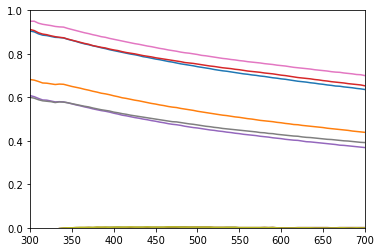

In [47]:
spectras = blanked_samples[wavelength_columns]
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)
    plt.xlim([300,700])
    plt.ylim([0,1])

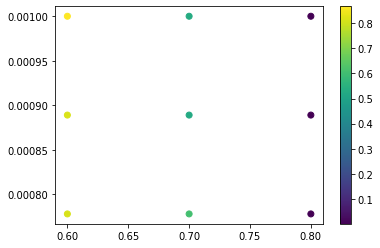

In [50]:
data = pd.read_csv(r'07_27_21_Manual_Blanked_Abs')
y = data['ODE concentration wtf']
x = data['ethanol concentration wtf']
z = data['400.0nm']

plt.scatter(x,y,c=z)
plt.colorbar()

In [49]:
data['ODE concentration wtf']

0    0.000778
1    0.000778
2    0.000778
3    0.000889
4    0.000889
5    0.000889
6    0.001000
7    0.001000
8    0.001000
Name: ODE concentration wtf, dtype: float64